### Reading data

In [1]:

dir_xavi = r"C:\Users\xavim\Desktop\Uni\3er\2\Syntesis/"
dir_maria = r"C:\Users\Maria\OneDrive - UAB\Documentos\3r de IA\Synthesis project II\Github/"

dir2DS = "Project_Synthesis2-/Datasets/DocTR_output/"
file2open = "Bank account statements/Estado de cuenta completo BBVA_0.txt"

try: 
    dir2Main = dir_xavi
    with open(dir_xavi+dir2DS+file2open, 'r', encoding = "utf8") as file:
        raw_data = file.readlines()
except:
    dir2Main = dir_maria
    with open(dir_maria+dir2DS+file2open, 'r', encoding = "utf8") as file:
        raw_data = file.readlines()
raw_data[:5]

["[1020, 6, 1092, 29, 'Estado', 0.9949026107788086, 17]\n",
 "[1092, 5, 1124, 31, 'de', 0.99998939037323, 19]\n",
 "[1124, 6, 1200, 29, 'Cuenta', 0.8463806509971619, 17]\n",
 "[920, 39, 999, 57, 'Libreton', 0.9874507188796997, 13]\n",
 "[1002, 36, 1064, 59, 'Basico', 0.6583079695701599, 17]\n"]

In [2]:
data = [item.strip("[]\n").split(", ") for item in raw_data]

for sublist in data:
    for i, item in enumerate(sublist):
        if item.isdigit():
            sublist[i] = int(item)
        elif item.replace('.', '', 1).isdigit():  # Check for floating point number
            sublist[i] = float(item)
        else:
            sublist[i] = item.strip("'")  # Remove single quotes from strings

print(data[:5])


[[1020, 6, 1092, 29, 'Estado', 0.9949026107788086, 17], [1092, 5, 1124, 31, 'de', 0.99998939037323, 19], [1124, 6, 1200, 29, 'Cuenta', 0.8463806509971619, 17], [920, 39, 999, 57, 'Libreton', 0.9874507188796997, 13], [1002, 36, 1064, 59, 'Basico', 0.6583079695701599, 17]]


In [1]:
#import ast
#
#list1 = ast.literal_eval(data[0] )
#list2 = ast.literal_eval(data[1] )

In [3]:
from pptx.util import Pt
from pptx import Presentation

def add_text_in_bounding_boxes(presentation, slide_index, text, coordinates):
    slide = presentation.slides[slide_index]
    left, top, width, height = coordinates
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = text
    p.font.size = Pt(10) # size 12 to keep uniformity and avoid text overlaps


In [4]:
from pptx.util import Pt
from pptx import Presentation
from pptx.dml.color import RGBColor

def add_text_in_bounding_boxes_colors(presentation, slide_index, text, coordinates, confidence):
    slide = presentation.slides[slide_index]
    left, top, width, height = coordinates
    txBox = slide.shapes.add_textbox(left, top, width, height)
    tf = txBox.text_frame
    p = tf.add_paragraph()
    p.text = text
    p.font.size = Pt(10) # size 12 to keep uniformity and avoid text overlaps
    if confidence > 0.9:
        p.font.color.rgb = RGBColor(0, 255, 0)
    elif confidence > 0.6:
        p.font.color.rgb = RGBColor(255, 165, 0)
    else:
        p.font.color.rgb = RGBColor(255, 0, 0)
    

In [5]:
def change_text_color(presentation, slide_index, color):
    slide = presentation.slides[slide_index]
    for shape in slide.shapes:
        if not shape.has_text_frame:
            continue
        for paragraph in shape.text_frame.paragraphs:
            for run in paragraph.runs:
                run.font.color.rgb = color

In [6]:
import aspose.pydrawing as draw
import aspose.slides as slides
import matplotlib.pyplot as plt
def plot_slide(presentation, slide, show=True):

    # Instantiate a Presentation class that represents the presentation file
    with slides.Presentation(presentation) as pres:
        # Access the first slide
        sld = pres.slides[slide]

        # User defined dimension
        desiredX = 210*4
        desiredY = 297*4

        # Getting scaled value  of X and Y
        ScaleX = (1.0 / pres.slide_size.size.width) * desiredX
        ScaleY = (1.0 / pres.slide_size.size.height) * desiredY


        # Create a full scale image
        bmp = sld.get_thumbnail(ScaleX, ScaleY)

        # save the image to disk in JPEG format
        bmp.save("temp.jpg", draw.imaging.ImageFormat.jpeg)
    
        fig, ax = plt.subplots(figsize=(21/2,29.7/2))
        plt.imshow(plt.imread("temp.jpg"))
        plt.axis("off")
        if show: 
            plt.show()
        return ax

### Tests

In [27]:
prova = [448, 119, 559, 148, 'PREVENCION', 0.9718858003616333, 21]

In [28]:
presentation = Presentation("template.pptx")

coordinates = Pt(prova[0] / 2), Pt(prova[1] / 2), Pt((prova[2] - prova[0]) / 2), Pt((prova[3] - prova[1]) / 2)

add_text_in_bounding_boxes(presentation, 0, prova[4], coordinates)
presentation.save("output2.pptx")

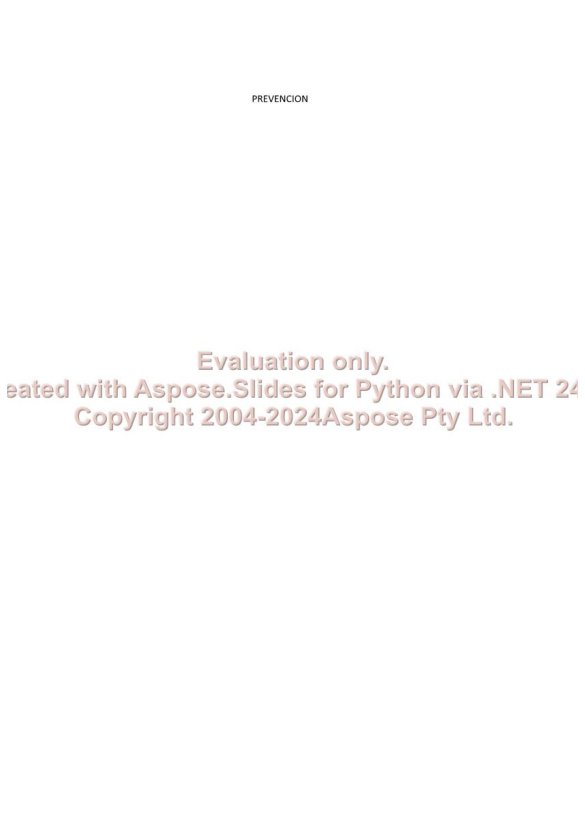

<Axes: >

In [29]:
plot_slide("output2.pptx", 0)

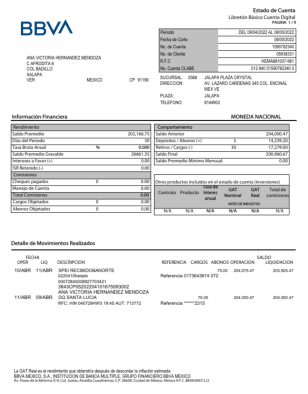

In [42]:
# open an image
from PIL import Image
import matplotlib.pyplot as plt

file_name, page = file2open.split("_")
page = page[:-4] # to remove .txt

img = Image.open(f"{dir2Main}/Project_Synthesis2-/Sample documents - PNG/{file_name}/{page}.png")
plt.figure(figsize=(6,7))
plt.imshow(img)
plt.axis("off")
plt.show()


In [43]:
width, height = img.size

In [65]:
presentation = Presentation("template.pptx")

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in data:
    coordinates = Pt(words[0] / 2.4), Pt(words[1] / 2.4), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)
    text = words[4]
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    
presentation.save("predefined_layout.pptx")

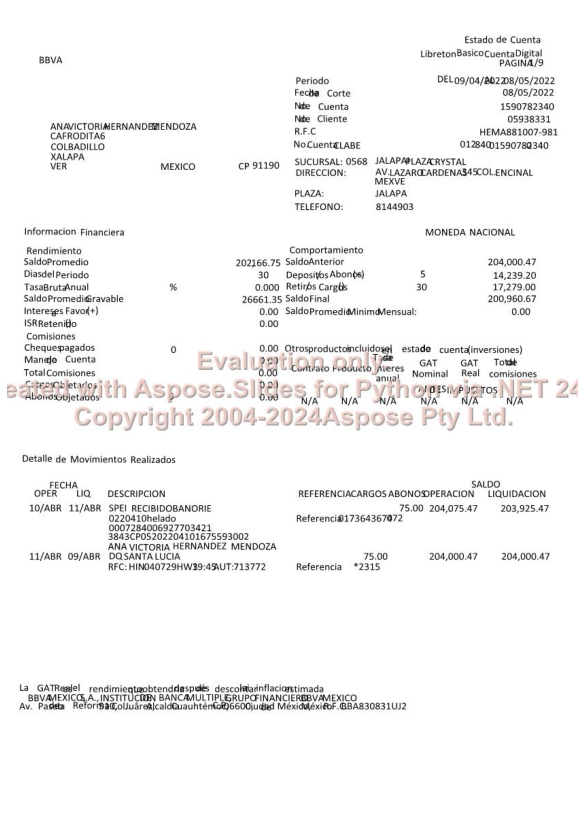

<Axes: >

In [66]:
plot_slide("predefined_layout.pptx", 0)

In [46]:
presentation = Presentation("template.pptx")


pixels_per_inch = 96  # Standard resolution for screens
new_width = int(width * 914400 / pixels_per_inch)
new_height = int(height * 914400 / pixels_per_inch)

# Resize the slide layout
presentation.slide_width = new_width
presentation.slide_height = new_height

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in data:
    coordinates = Pt(words[0] / 2), Pt(words[1] / 2.1), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)    
    text = words[4]
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    
presentation.save("with_image_layout.pptx")

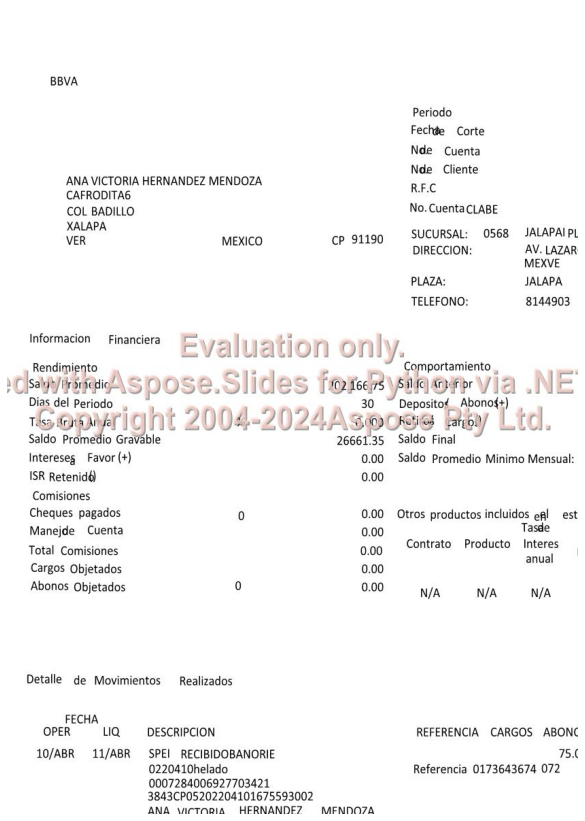

<Axes: >

In [47]:
plot_slide("with_image_layout.pptx", 0)

In [54]:
presentation = Presentation("template.pptx")


pixels_per_inch = 96  # Standard resolution for screens
new_width = int(width * 914400 / pixels_per_inch)
new_height = int(height * 914400 / pixels_per_inch)

# Resize the slide layout
presentation.slide_width = new_width
presentation.slide_height = new_height

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in data:
    coordinates = Pt(words[0] / 2.5), Pt(words[1] / 3), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)    
    text = words[4]
    confidence = words[5]
    add_text_in_bounding_boxes_colors(presentation, 0, text, coordinates, confidence)
    
presentation.save("image_layout_confidence_words.pptx")

change_text_color(presentation, 0, RGBColor(0, 0, 0))
presentation.save("remove_colors.pptx")

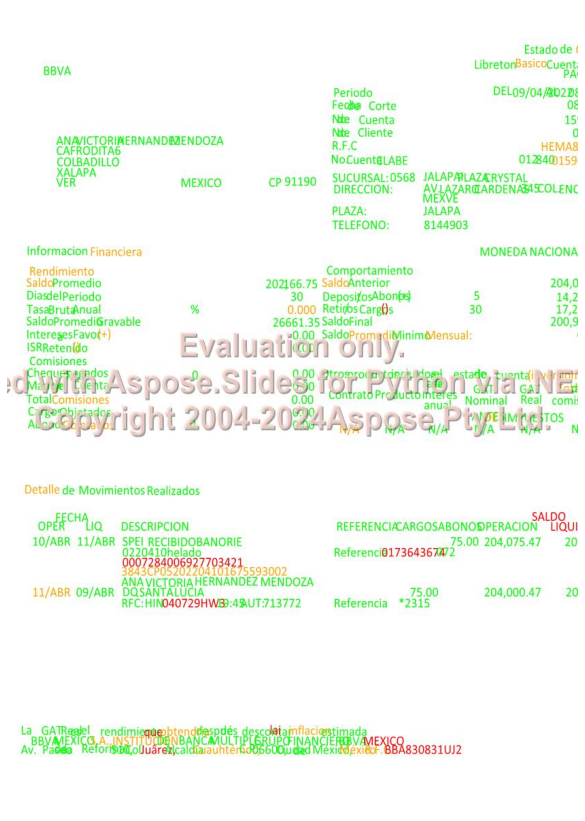

<Axes: >

In [55]:
plot_slide("image_layout_confidence_words.pptx", 0)

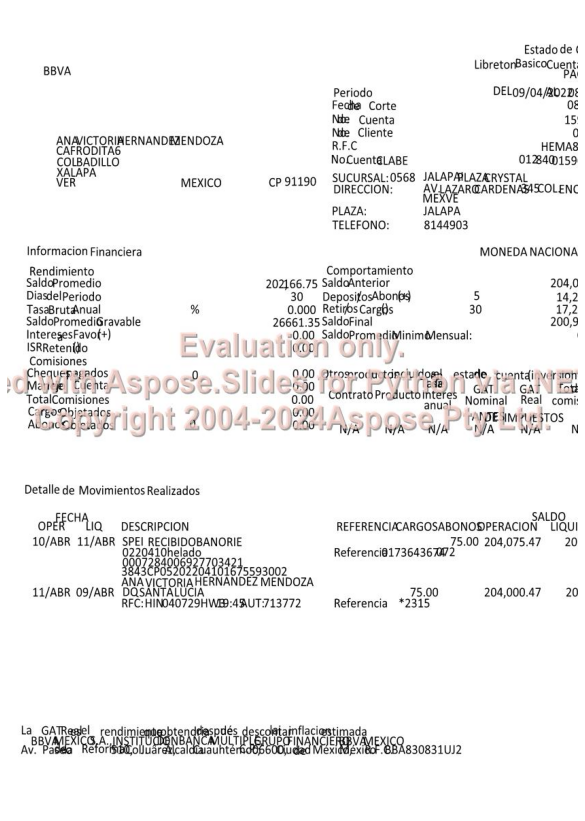

<Axes: >

In [56]:
plot_slide("remove_colors.pptx", 0)

### Trying to cluster text from the same line

In [21]:
from pptx.util import Pt
from pptx import Presentation

In [68]:
from PIL import Image
import matplotlib.pyplot as plt

file_name, page = file2open.split("_")
page = page[:-4] # to remove .txt

img = Image.open(f"{dir2Main}/Project_Synthesis2-/Sample documents - PNG/{file_name}/{page}.png")
width, height = img.size

In [71]:
presentation = Presentation("template.pptx")

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words in data:
    coordinates = Pt(words[0] / 2.4), Pt(words[1] / 2.4), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)
    text = words[4]
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    
presentation.save("clustering.pptx")

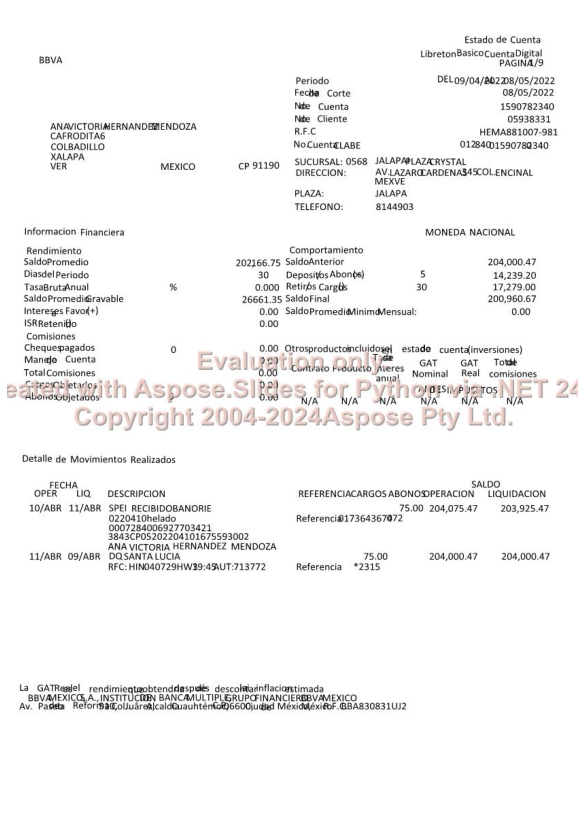

<Axes: >

In [72]:
plot_slide("clustering.pptx", 0)

#### using DBSCAN

In [73]:
clusters = {}

words_bounding_boxes = []
words_text = []
# mean 
for words in data:
    words_bounding_boxes.append([Pt(words[0] / 2), Pt(words[1] / 2.1), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)])
    words_text.append(words[4])

In [74]:
def y_distance(x, y):
    return abs(x[1]-y[1])

In [75]:
from sklearn.cluster import DBSCAN
import numpy as np

# Extract features
X = np.array(words_bounding_boxes)  # Features: x, y, width, height

# Apply DBSCAN clustering
eps = 30000 # Maximum distance between two samples for them to be considered as in the same neighborhood
min_samples = 2  # Minimum number of samples in a neighborhood
dbscan = DBSCAN(eps=eps, min_samples=min_samples, metric = y_distance)
labels = dbscan.fit_predict(X)

# Group words into lines based on cluster labels
lines = {}
for i, label in enumerate(labels):
    if label not in lines:
        lines[label] = []
    lines[label].append(words_text[i])

print(lines)

# # Sort words within each line by x-coordinate
# for line in lines.values():
#     line.sort(key=lambda word: words_bounding_boxes[words_text.index(word)][0])

# # Merge words into lines
# merged_lines = [' '.join(words) for words in lines.values()]

# # Print or use merged lines
# for line in merged_lines:
#     print(line)


{0: ['Estado', 'de', 'Cuenta'], 1: ['Libreton', 'Basico', 'Cuenta', 'Digital'], 2: ['DEL', '09/04/2022', 'AL', '08/05/2022', 'Periodo'], 3: ['PAGINA', '1/9'], 4: ['08/05/2022', 'Fecha', 'de', 'Corte'], 5: ['1590782340', 'No.', 'de', 'Cuenta'], 6: ['05938331', 'No.', 'de', 'Cliente'], 7: ['HEMA881007-981', 'R.F.C'], 8: ['012', '840', '01590782340', '0', 'No.', 'Cuenta', 'CLABE', 'COL', 'BADILLO'], 9: ['DIRECCION:', 'AV.', 'LAZARO', 'CARDENAS', '345', 'COL.', 'ENCINAL'], 10: ['PLAZA:', 'JALAPA'], 11: ['TELEFONO:', '8144903'], -1: ['BBVA', 'CAFRODITA6', 'XALAPA', 'MEXVE', 'Comisiones', 'anual', '0007284006927703421', '3843CP05202204101675593002'], 12: ['ANA', 'VICTORIA', 'HERNANDEZ', 'MENDOZA'], 13: ['VER', 'MEXICO', 'CP', '91190'], 14: ['SUCURSAL:', '0568', 'JALAPAI', 'PLAZA', 'CRYSTAL'], 15: ['Informacion', 'Financiera', 'MONEDA', 'NACIONAL'], 16: ['Rendimiento', 'Comportamiento'], 17: ['Saldo', 'Promedio', '202,', '166.75', 'Saldo', 'Anterior', '204,000.47'], 18: ['Dias', 'del', 'Perio

In [76]:
import seaborn

num_clusters = labels.max() - labels.min()

colorsMap = seaborn.color_palette("Set2", num_clusters)
colorsMap

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961)]

C:\Users\Maria\AppData\Local\Temp\ipykernel_21600\209322820.py:14: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(centrex, centrey, "ro", color=colorsMap[label])


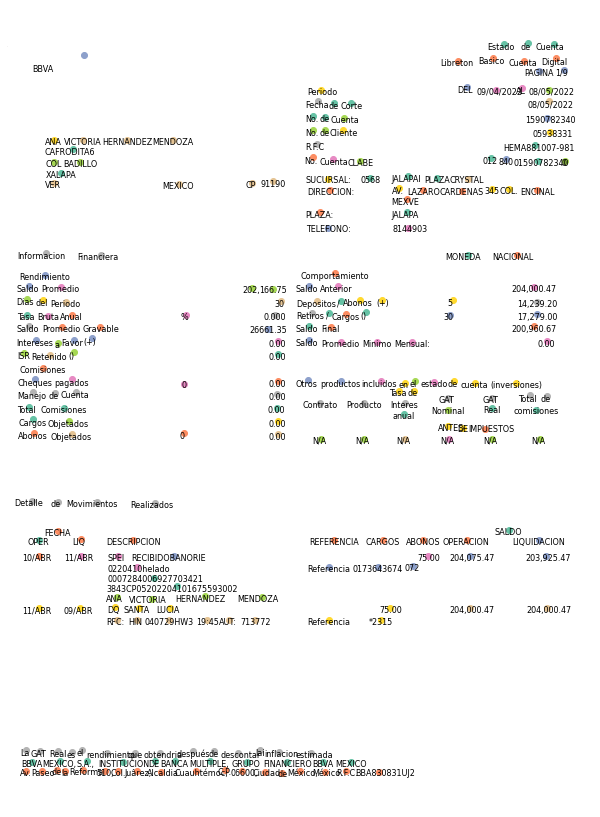

In [96]:
presentation = Presentation("template.pptx")

ax = plot_slide("clustering.pptx", 0, 0)

# coordinates /2 to fit the template, /2.1 to avoid text overlaps as it starts from higher (ns pq)
for words, label in zip(data, labels):
    coordinates = Pt(words[0] / 2.5), Pt(words[1] / 2.5), Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)
    centrex = (Pt(words[0] / 2) + Pt((words[2] - words[0]) / 4))
    centrey = (Pt(words[1] / 2) - Pt((words[3] - words[1]) / 4))
    text = words[4]
    
    add_text_in_bounding_boxes(presentation, 0, text, coordinates)
    ax.text(Pt(words[0]/2), Pt(words[1]/2), words[4], fontsize=8)
    ax.plot(centrex, centrey, "ro", color=colorsMap[label])

plt.show()
presentation.save("clustering2.pptx")

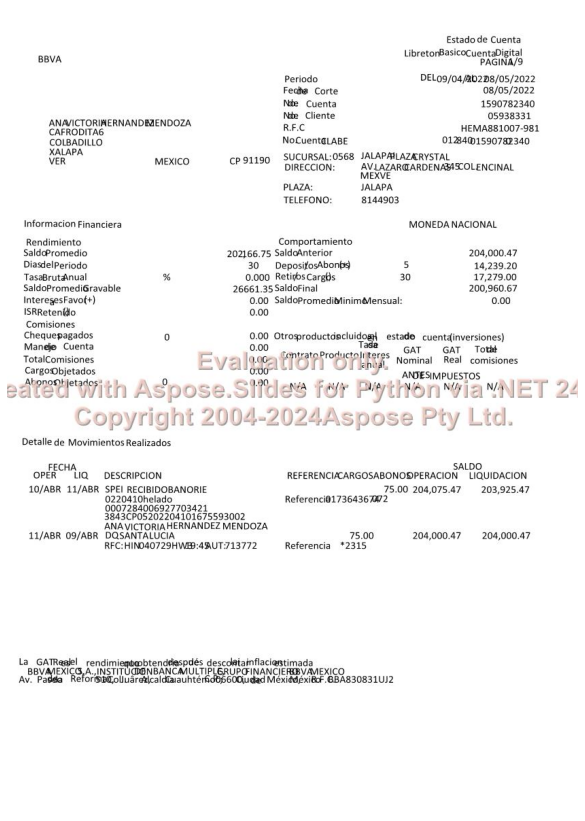

<Axes: >

In [97]:
plot_slide("clustering2.pptx", 0)

#### using a manual method

In [89]:
data.sort(key=lambda x: x[1])  # Sort the list by the y value

line = 0
value = data[0][1]

for i, word in enumerate(data):
    if abs(word[1] - value) < 8:
        data[i] = tuple(list(word) + [line])
    else:
        line += 1
        data[i] = tuple(list(word) + [line])
    value = word[1]

In [93]:
import seaborn
num_lines = data[-1][-1] + 1
colorsMap = seaborn.color_palette("Set2", num_lines)
colorsMap

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254),
 (0.4, 0.7607843137254902, 0.6470588235294118)]

C:\Users\Maria\AppData\Local\Temp\ipykernel_21600\3673956685.py:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  ax.plot(centrex, centrey, "ro", color=colorsMap[words[-1]])


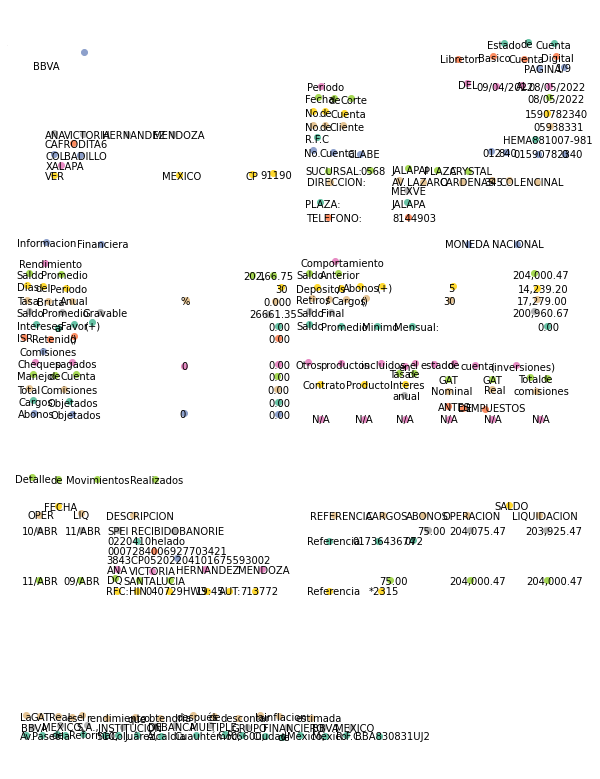

In [95]:
presentation = Presentation("template.pptx")

ax = plot_slide("clustering.pptx", 0, 0)

for words in data:
    # Calculate the coordinates and center of the word
    x, y = Pt(words[0] / 2), Pt(words[1] / 2.1)
    width, height = Pt((words[2] - words[0]) / 2), Pt((words[3] - words[1]) / 2)
    centrex = x + width / 2
    centrey = y - height / 2
    
    # Add the word to the plot
    ax.text(x, y, words[4])
    ax.plot(centrex, centrey, "ro", color=colorsMap[words[-1]])
    
plt.show()